In [1]:
import os
import dendropy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# Set the root directory to start the search
root_dir = "~~2025-05-29/flyway"  # <-- Replace this
### make sure there are no special characters in the taxon names 

# Open output file for writing
with open("flyway_output.txt", "w") as out_file:
    # Recursively walk through all subdirectories
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if "outfilemcc.tree" in filenames:
            filepath = os.path.join(dirpath, "outfilemcc.tree")
            out_file.write(f"\nProcessing file: {filepath}\n")

            # Load the tree
            tree = dendropy.Tree.get(
                path=filepath,
                schema="nexus",
                preserve_underscores=True
            )

            # Get root node
            root_node = tree.seed_node

            # Extract annotations of interest
            flyway_set = None
            flyway_prob = None
            for ann in root_node.annotations:
                if ann.name == "flyway.set":
                    flyway_set = ann.value
                elif ann.name == "flyway.set.prob":
                    flyway_prob = ann.value

            # Write results to file
            out_file.write(f"  flyway.set: {flyway_set}\n")
            out_file.write(f"  flyway.set.prob: {flyway_prob}\n")

In [3]:
with open("flyway_output.txt") as f:
    lines = f.readlines()

records = []
current_replicate = None
current_flyway_order = None

# Regex for floating numbers including scientific notation
float_re = re.compile(r"[-+]?\d*\.\d+(?:[Ee][-+]?\d+)?|[-+]?\d+(?:[Ee][-+]?\d+)?")

for line in lines:
    line = line.strip()

    if line.startswith("Processing file:"):
        match = re.search(r"replicate_(\d+)", line)
        if match:
            current_replicate = match.group(1)

    elif line.startswith("flyway.set:"):
        current_flyway_order = re.findall(r'"(.*?)"', line)

    elif line.startswith("flyway.set.prob:"):
        probs = float_re.findall(line)
        if current_flyway_order and probs:
            record = {"replicate": int(current_replicate)}
            for flyway, prob in zip(current_flyway_order, probs):
                record[flyway] = float(prob)
            records.append(record)

df = pd.DataFrame(records)
df = df.sort_values("replicate").reset_index(drop=True)
df.to_csv("flyway_probabilities.csv", index=False)

print(df.head())


   replicate  central_flyway  atlantic_flyway  mississippi_flyway  \
0          1        0.037736         0.937847            0.018868   
1          2        0.002220         0.978912            0.015538   
2          3        0.001110         0.022198            0.005549   
3          4        0.005549         0.886792            0.009989   
4          5        0.960044         0.019978            0.007769   

   pacific_flyway  
0        0.005549  
1        0.003330  
2        0.971143  
3        0.097669  
4        0.012209  


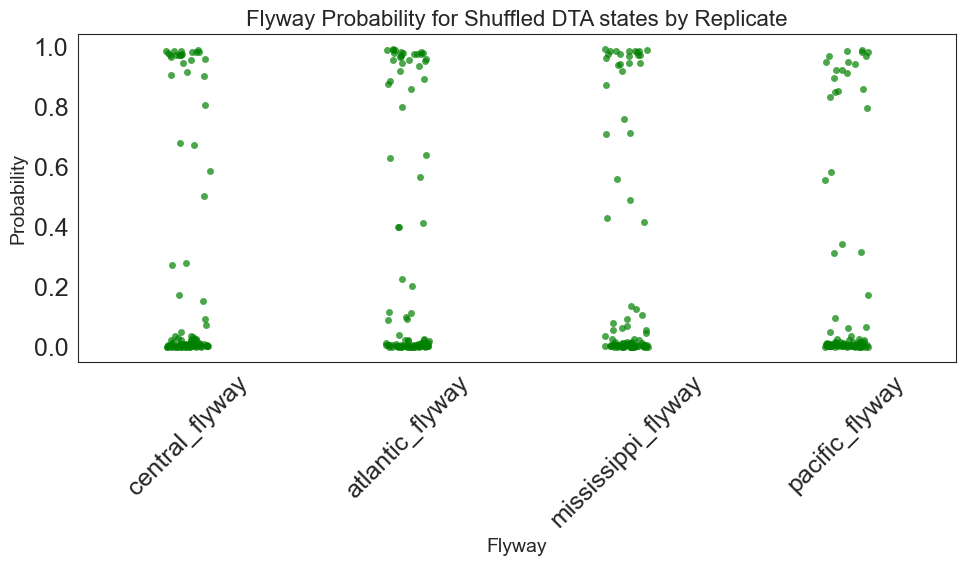

In [4]:
# Melt to long format
df_long = df.melt(id_vars="replicate", var_name="flyway", value_name="probability")

# Set font globally to Arial and increase size
plt.rcParams.update({
    "font.size": 18,
    "font.family": "Arial"
})

plt.figure(figsize=(10, 6))

# Remove grid lines by setting style to 'white' or disable grid
sns.set_style("white")  # white background with no grid

# Create the stripplot with green dots and jitter
sns.stripplot(data=df_long, x="flyway", y="probability", jitter=True, alpha=0.7, color="green")

plt.title("Flyway Probability for Shuffled DTA states by Replicate", fontsize=16)
plt.ylabel("Probability", fontsize=14)
plt.xlabel("Flyway", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()

# Save plot to PDF
plt.savefig("flyway_probabilities_by_replicate.pdf", format='pdf')

plt.show()


In [5]:
# For each flyway, calculate the percentage of replicates with prob > 0.5

(df.drop(columns="replicate") > 0.5).sum() / len(df)
(df.drop(columns="replicate")).sum() / len(df)

central_flyway        0.253008
atlantic_flyway       0.301665
mississippi_flyway    0.247458
pacific_flyway        0.197869
dtype: float64

   replicate      Wild  Domestic  Backyard_bird
0          1  1.000000       NaN            NaN
1          2  0.997780   0.00222            NaN
2          3  0.995560   0.00444            NaN
3          4  0.997780   0.00222            NaN
4          5  0.988901       NaN       0.011099


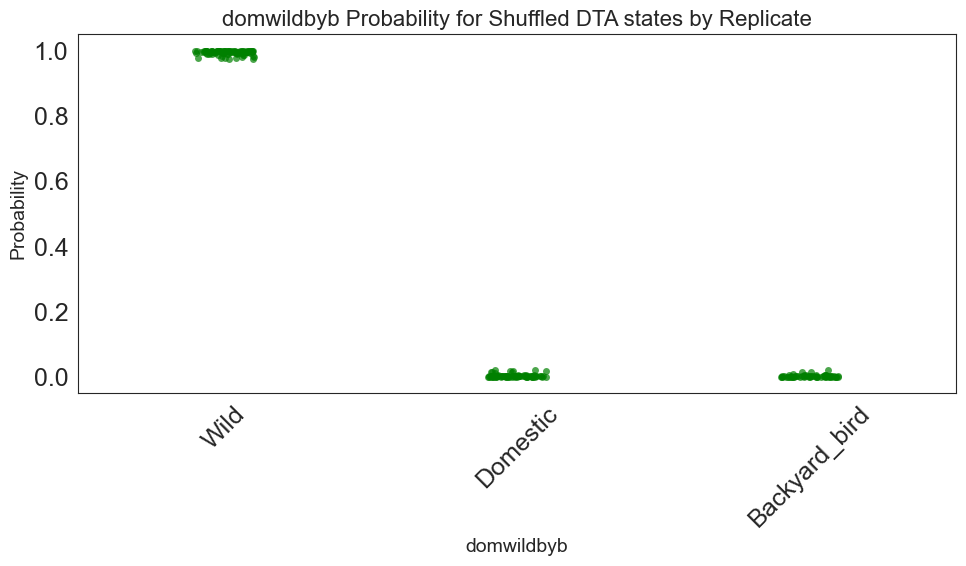

Wild             0.994462
Domestic         0.003441
Backyard_bird    0.002098
dtype: float64

In [6]:
# Set the root directory to start the search
root_dir = "~~2025-05-29/byb"  # <-- Replace this

### make sure there are no special characters in the taxon names 
# Open output file for writing
with open("domwildbyb_output.txt", "w") as out_file:
    # Recursively walk through all subdirectories
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if "outfilemcc.tree" in filenames:
            filepath = os.path.join(dirpath, "outfilemcc.tree")
            out_file.write(f"\nProcessing file: {filepath}\n")

            # Load the tree
            tree = dendropy.Tree.get(
                path=filepath,
                schema="nexus",
                preserve_underscores=True
            )

            # Get root node
            root_node = tree.seed_node

            # Extract annotations of interest
            domwildbyb_set = None
            domwildbyb_prob = None
            for ann in root_node.annotations:
                if ann.name == "domwildbyb.set":
                    domwildbyb_set = ann.value
                elif ann.name == "domwildbyb.set.prob":
                    domwildbyb_prob = ann.value

            # Write results to file
            out_file.write(f"  domwildbyb.set: {domwildbyb_set}\n")
            out_file.write(f"  domwildbyb.set.prob: {domwildbyb_prob}\n")


with open("domwildbyb_output.txt") as f:
    lines = f.readlines()

records = []
current_replicate = None
current_domwildbyb_order = None

# Regex for floating numbers including scientific notation
float_re = re.compile(r"[-+]?\d*\.\d+(?:[Ee][-+]?\d+)?|[-+]?\d+(?:[Ee][-+]?\d+)?")

for line in lines:
    line = line.strip()

    if line.startswith("Processing file:"):
        match = re.search(r"replicate_(\d+)", line)
        if match:
            current_replicate = match.group(1)

    elif line.startswith("domwildbyb.set:"):
        current_domwildbyb_order = re.findall(r'"(.*?)"', line)

    elif line.startswith("domwildbyb.set.prob:"):
        probs = float_re.findall(line)
        if current_domwildbyb_order and probs:
            record = {"replicate": int(current_replicate)}
            for domwildbyb, prob in zip(current_domwildbyb_order, probs):
                record[domwildbyb] = float(prob)
            records.append(record)

df = pd.DataFrame(records)
df = df.sort_values("replicate").reset_index(drop=True)
df.to_csv("domwildbyb_probabilities.csv", index=False)

print(df.head())

# Melt to long format
df_long = df.melt(id_vars="replicate", var_name="domwildbyb", value_name="probability")

# Set font globally to Arial and increase size
plt.rcParams.update({
    "font.size": 18,
    "font.family": "Arial"
})

plt.figure(figsize=(10, 6))

# Remove grid lines by setting style to 'white' or disable grid
sns.set_style("white")  # white background with no grid

# Create the stripplot with green dots and jitter
sns.stripplot(data=df_long, x="domwildbyb", y="probability", jitter=True, alpha=0.7, color="green")

plt.title("domwildbyb Probability for Shuffled DTA states by Replicate", fontsize=16)
plt.ylabel("Probability", fontsize=14)
plt.xlabel("domwildbyb", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()

# Save plot to PDF
plt.savefig("domwildbyb_probabilities_by_replicate.pdf", format='pdf')

plt.show()

(df.drop(columns="replicate")).sum() / len(df)

   replicate     Wild  Domestic
0          3  0.99889   0.00111
1          4  0.99778   0.00222
2          8  0.99889   0.00111
3          9  0.99889   0.00111
4         10  0.99778   0.00222


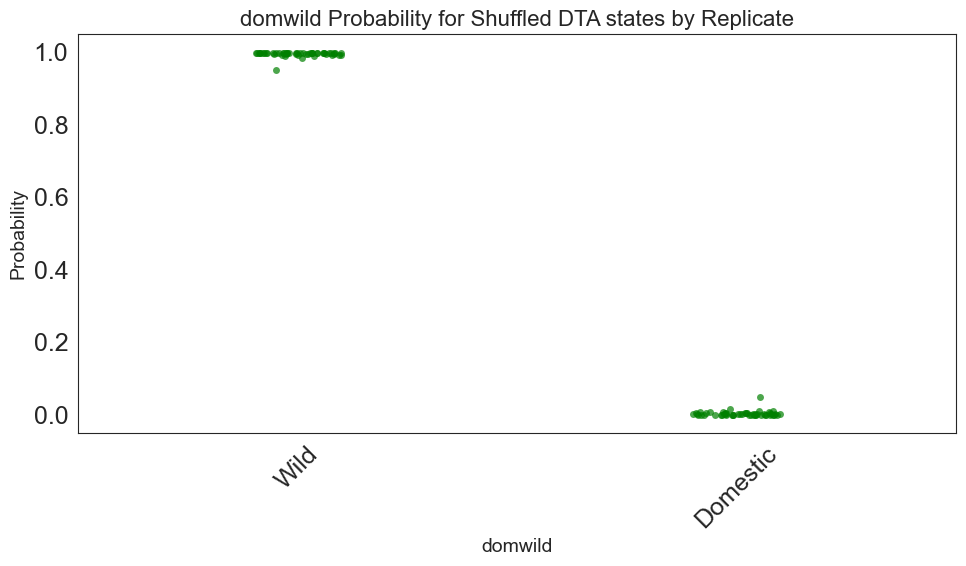

Wild        0.995689
Domestic    0.004311
dtype: float64

In [8]:
# Set the root directory to start the search
root_dir = "~~2025-05-29/domwild/domwild"  # <-- Replace this

# Open output file for writing
with open("domwild_output.txt", "w") as out_file:
    # Recursively walk through all subdirectories
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if "outfilemcc.tree" in filenames:
            filepath = os.path.join(dirpath, "outfilemcc.tree")
            out_file.write(f"\nProcessing file: {filepath}\n")

            # Load the tree
            tree = dendropy.Tree.get(
                path=filepath,
                schema="nexus",
                preserve_underscores=True
            )

            # Get root node
            root_node = tree.seed_node

            # Extract annotations of interest
            domwild_set = None
            domwild_prob = None
            for ann in root_node.annotations:
                if ann.name == "domwild.set":
                    domwild_set = ann.value
                elif ann.name == "domwild.set.prob":
                    domwild_prob = ann.value

            # Write results to file
            out_file.write(f"  domwild.set: {domwild_set}\n")
            out_file.write(f"  domwild.set.prob: {domwild_prob}\n")


with open("domwild_output.txt") as f:
    lines = f.readlines()

records = []
current_replicate = None
current_domwild_order = None

# Regex for floating numbers including scientific notation
float_re = re.compile(r"[-+]?\d*\.\d+(?:[Ee][-+]?\d+)?|[-+]?\d+(?:[Ee][-+]?\d+)?")

for line in lines:
    line = line.strip()

    if line.startswith("Processing file:"):
        match = re.search(r"replicate_(\d+)", line)
        if match:
            current_replicate = match.group(1)

    elif line.startswith("domwild.set:"):
        current_domwild_order = re.findall(r'"(.*?)"', line)

    elif line.startswith("domwild.set.prob:"):
        probs = float_re.findall(line)
        if current_domwild_order and probs:
            record = {"replicate": int(current_replicate)}
            for domwild, prob in zip(current_domwild_order, probs):
                record[domwild] = float(prob)
            records.append(record)

df = pd.DataFrame(records)
df = df.sort_values("replicate").reset_index(drop=True)
df.to_csv("domwild_probabilities.csv", index=False)

print(df.head())

# Melt to long format
df_long = df.melt(id_vars="replicate", var_name="domwild", value_name="probability")

# Set font globally to Arial and increase size
plt.rcParams.update({
    "font.size": 18,
    "font.family": "Arial"
})

plt.figure(figsize=(10, 6))

# Remove grid lines by setting style to 'white' or disable grid
sns.set_style("white")  # white background with no grid

# Create the stripplot with green dots and jitter
sns.stripplot(data=df_long, x="domwild", y="probability", jitter=True, alpha=0.7, color="green")

plt.title("domwild Probability for Shuffled DTA states by Replicate", fontsize=16)
plt.ylabel("Probability", fontsize=14)
plt.xlabel("domwild", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()

# Save plot to PDF
plt.savefig("domwild_probabilities_by_replicate.pdf", format='pdf')

plt.show()

(df.drop(columns="replicate")).sum() / len(df)

   replicate  domestic    turkey      wild
0          1  0.014428  0.013319  0.972253
1          2  0.014428  0.002220  0.983352
2          3  0.012209  0.004440  0.983352
3          4  0.003330  0.017758  0.978912
4          5  0.019978  0.004440  0.975583


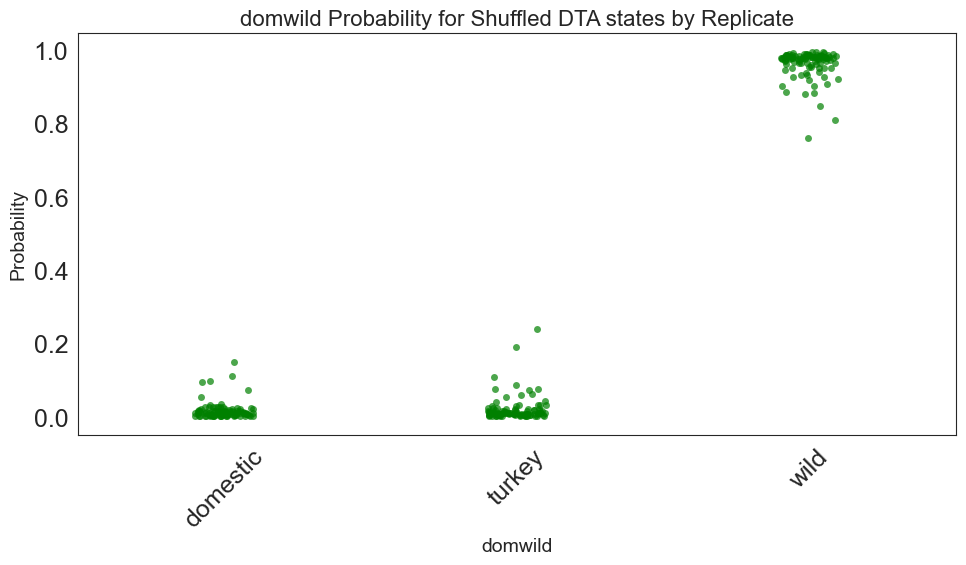

domestic    0.016149
turkey      0.020566
wild        0.963285
dtype: float64

In [9]:
# Set the root directory to start the search
root_dir = "~~2025-05-29/domwild/domwildturkey"  # <-- Replace this

# Open output file for writing
with open("domwild_output.txt", "w") as out_file:
    # Recursively walk through all subdirectories
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if "outfilemcc.tree" in filenames:
            filepath = os.path.join(dirpath, "outfilemcc.tree")
            out_file.write(f"\nProcessing file: {filepath}\n")

            # Load the tree
            tree = dendropy.Tree.get(
                path=filepath,
                schema="nexus",
                preserve_underscores=True
            )

            # Get root node
            root_node = tree.seed_node

            # Extract annotations of interest
            domwild_set = None
            domwild_prob = None
            for ann in root_node.annotations:
                if ann.name == "domwild.set":
                    domwild_set = ann.value
                elif ann.name == "domwild.set.prob":
                    domwild_prob = ann.value

            # Write results to file
            out_file.write(f"  domwild.set: {domwild_set}\n")
            out_file.write(f"  domwild.set.prob: {domwild_prob}\n")


with open("domwild_output.txt") as f:
    lines = f.readlines()

records = []
current_replicate = None
current_domwild_order = None

# Regex for floating numbers including scientific notation
float_re = re.compile(r"[-+]?\d*\.\d+(?:[Ee][-+]?\d+)?|[-+]?\d+(?:[Ee][-+]?\d+)?")

for line in lines:
    line = line.strip()

    if line.startswith("Processing file:"):
        match = re.search(r"replicate_(\d+)", line)
        if match:
            current_replicate = match.group(1)

    elif line.startswith("domwild.set:"):
        current_domwild_order = re.findall(r'"(.*?)"', line)

    elif line.startswith("domwild.set.prob:"):
        probs = float_re.findall(line)
        if current_domwild_order and probs:
            record = {"replicate": int(current_replicate)}
            for domwild, prob in zip(current_domwild_order, probs):
                record[domwild] = float(prob)
            records.append(record)

df = pd.DataFrame(records)
df = df.sort_values("replicate").reset_index(drop=True)
df.to_csv("domwild_probabilities.csv", index=False)

print(df.head())

# Melt to long format
df_long = df.melt(id_vars="replicate", var_name="domwild", value_name="probability")

# Set font globally to Arial and increase size
plt.rcParams.update({
    "font.size": 18,
    "font.family": "Arial"
})

plt.figure(figsize=(10, 6))

# Remove grid lines by setting style to 'white' or disable grid
sns.set_style("white")  # white background with no grid

# Create the stripplot with green dots and jitter
sns.stripplot(data=df_long, x="domwild", y="probability", jitter=True, alpha=0.7, color="green")

plt.title("domwild Probability for Shuffled DTA states by Replicate", fontsize=16)
plt.ylabel("Probability", fontsize=14)
plt.xlabel("domwild", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()

# Save plot to PDF
plt.savefig("domwildturkfinal_probabilities_by_replicate.pdf", format='pdf')

plt.show()


(df.drop(columns="replicate")).sum() / len(df)

   replicate   Europe  North_America     Asia
0          4  0.00111        0.99778  0.00111
1          6  0.00111        0.99889      NaN
2          8  0.00111        0.99889      NaN
3         14      NaN        0.99889  0.00111
4         25      NaN        0.99889  0.00111


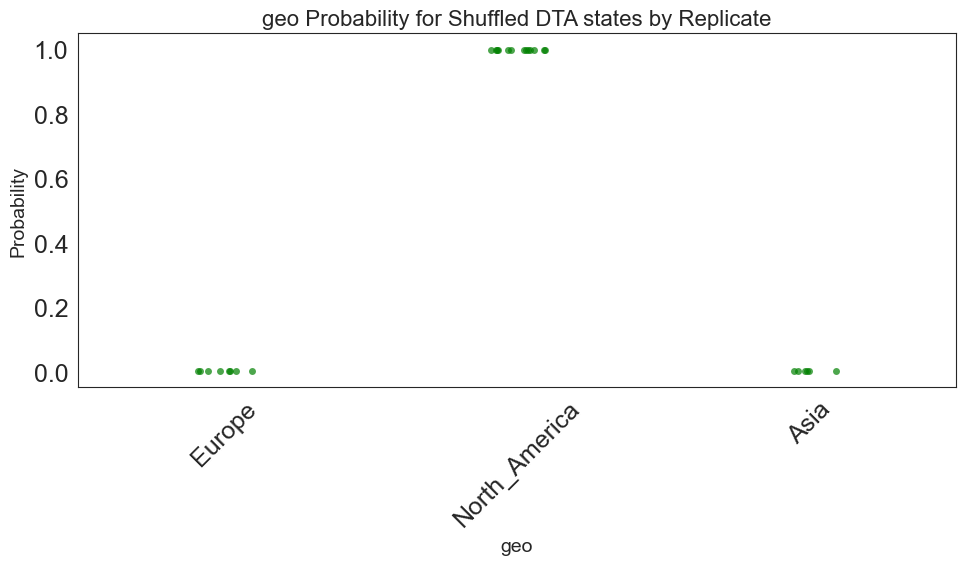

               geo  percent_above_0.5
    central_flyway               26.0
   atlantic_flyway               30.0
mississippi_flyway               24.0
    pacific_flyway               20.0


Europe           0.000683
North_America    0.998805
Asia             0.000512
dtype: float64

In [43]:
# Set the root directory to start the search
root_dir = "~~2025-05-29/global"  # <-- Replace this

# Open output file for writing
with open("geo_output.txt", "w") as out_file:
    # Recursively walk through all subdirectories
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if "outfilemcc.tree" in filenames:
            filepath = os.path.join(dirpath, "outfilemcc.tree")
            out_file.write(f"\nProcessing file: {filepath}\n")

            # Load the tree
            tree = dendropy.Tree.get(
                path=filepath,
                schema="nexus",
                preserve_underscores=True
            )

            # Get root node
            root_node = tree.seed_node

            # Extract annotations of interest
            geo_set = None
            geo_prob = None
            for ann in root_node.annotations:
                if ann.name == "geo.set":
                    geo_set = ann.value
                elif ann.name == "geo.set.prob":
                    geo_prob = ann.value

            # Write results to file
            out_file.write(f"  geo.set: {geo_set}\n")
            out_file.write(f"  geo.set.prob: {geo_prob}\n")


with open("geo_output.txt") as f:
    lines = f.readlines()

records = []
current_replicate = None
current_geo_order = None

# Regex for floating numbers including scientific notation
float_re = re.compile(r"[-+]?\d*\.\d+(?:[Ee][-+]?\d+)?|[-+]?\d+(?:[Ee][-+]?\d+)?")

for line in lines:
    line = line.strip()

    if line.startswith("Processing file:"):
        match = re.search(r"replicate_(\d+)", line)
        if match:
            current_replicate = match.group(1)

    elif line.startswith("geo.set:"):
        current_geo_order = re.findall(r'"(.*?)"', line)

    elif line.startswith("geo.set.prob:"):
        probs = float_re.findall(line)
        if current_geo_order and probs:
            record = {"replicate": int(current_replicate)}
            for geo, prob in zip(current_geo_order, probs):
                record[geo] = float(prob)
            records.append(record)

df = pd.DataFrame(records)
df = df.sort_values("replicate").reset_index(drop=True)
df.to_csv("geo_probabilities.csv", index=False)

print(df.head())

# Melt to long format
df_long = df.melt(id_vars="replicate", var_name="geo", value_name="probability")

# Set font globally to Arial and increase size
plt.rcParams.update({
    "font.size": 18,
    "font.family": "Arial"
})

plt.figure(figsize=(10, 6))

# Remove grid lines by setting style to 'white' or disable grid
sns.set_style("white")  # white background with no grid

# Create the stripplot with green dots and jitter
sns.stripplot(data=df_long, x="geo", y="probability", jitter=True, alpha=0.7, color="green")

plt.title("geo Probability for Shuffled DTA states by Replicate", fontsize=16)
plt.ylabel("Probability", fontsize=14)
plt.xlabel("geo", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()

# Save plot to PDF
plt.savefig("geo_probabilities_by_replicate.pdf", format='pdf')

plt.show()


(df.drop(columns="replicate")).sum() / len(df)




   replicate  domestic  nonhuman_mammal  Migratory  Part_Migratory  Sedentary
0          1  0.485017          0.00111   0.461709        0.049945   0.002220
1          2  0.406215          0.00222   0.507214        0.079911   0.004440
2          3  0.435072          0.00111   0.539401        0.014428   0.009989
3          4  0.570477          0.00444   0.355161        0.068812   0.001110
4          5  0.471698              NaN   0.501665        0.026637        NaN


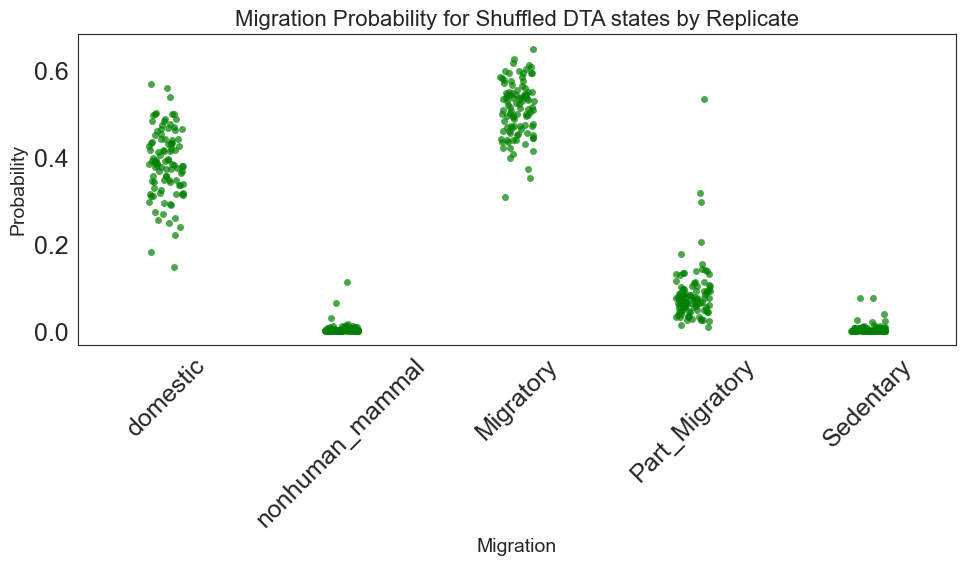

domestic           0.388679
nonhuman_mammal    0.006382
Migratory          0.512553
Part_Migratory     0.086038
Sedentary          0.006349
dtype: float64

In [55]:
# Set the root directory to start the search
root_dir = "~~2025-05-29/migration"  # <-- Replace this

# Open output file for writing
with open("Migration_output.txt", "w") as out_file:
    # Recursively walk through all subdirectories
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if "outfilemcc.tree" in filenames:
            filepath = os.path.join(dirpath, "outfilemcc.tree")
            out_file.write(f"\nProcessing file: {filepath}\n")

            # Load the tree
            tree = dendropy.Tree.get(
                path=filepath,
                schema="nexus",
                preserve_underscores=True
            )

            # Get root node
            root_node = tree.seed_node

            # Extract annotations of interest
            Migration_set = None
            Migration_prob = None
            for ann in root_node.annotations:
                if ann.name == "Migration.set":
                    Migration_set = ann.value
                elif ann.name == "Migration.set.prob":
                    Migration_prob = ann.value

            # Write results to file
            out_file.write(f"  Migration.set: {Migration_set}\n")
            out_file.write(f"  Migration.set.prob: {Migration_prob}\n")


with open("Migration_output.txt") as f:
    lines = f.readlines()

records = []
current_replicate = None
current_Migration_order = None

# Regex for floating numbers including scientific notation
float_re = re.compile(r"[-+]?\d*\.\d+(?:[Ee][-+]?\d+)?|[-+]?\d+(?:[Ee][-+]?\d+)?")

for line in lines:
    line = line.strip()

    if line.startswith("Processing file:"):
        match = re.search(r"replicate_(\d+)", line)
        if match:
            current_replicate = match.group(1)

    elif line.startswith("Migration.set:"):
        current_Migration_order = re.findall(r'"(.*?)"', line)

    elif line.startswith("Migration.set.prob:"):
        probs = float_re.findall(line)
        if current_Migration_order and probs:
            record = {"replicate": int(current_replicate)}
            for Migration, prob in zip(current_Migration_order, probs):
                record[Migration] = float(prob)
            records.append(record)

df = pd.DataFrame(records)
df = df.sort_values("replicate").reset_index(drop=True)
df.to_csv("Migration_probabilities.csv", index=False)

print(df.head())

# Melt to long format
df_long = df.melt(id_vars="replicate", var_name="Migration", value_name="probability")

# Set font globally to Arial and increase size
plt.rcParams.update({
    "font.size": 18,
    "font.family": "Arial"
})

plt.figure(figsize=(10, 6))

# Remove grid lines by setting style to 'white' or disable grid
sns.set_style("white")  # white background with no grid

# Create the stripplot with green dots and jitter
sns.stripplot(data=df_long, x="Migration", y="probability", jitter=True, alpha=0.7, color="green")

plt.title("Migration Probability for Shuffled DTA states by Replicate", fontsize=16)
plt.ylabel("Probability", fontsize=14)
plt.xlabel("Migration", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()

# Save plot to PDF
plt.savefig("Migration_probabilities_by_replicate.pdf", format='pdf')

plt.show()


(df.drop(columns="replicate")).sum() / len(df)

   replicate  galliformes  strigiformes  accipitriformes  charadriiformes  \
0          1     0.143174      0.179800         0.109878         0.062153   
1          2     0.180910      0.096559         0.066593         0.225305   
2          3     0.273030      0.104329         0.146504         0.153163   
3          4     0.078801      0.108768         0.332963         0.152053   
4          5     0.065483      0.108768         0.275250         0.223085   

   nonhuman-mammal  passeriformes  anseriformes  
0         0.320755       0.028857      0.155383  
1         0.314095       0.029967      0.086570  
2         0.133185       0.031077      0.158713  
3         0.147614       0.025527      0.154273  
4         0.207547       0.016648      0.103219  


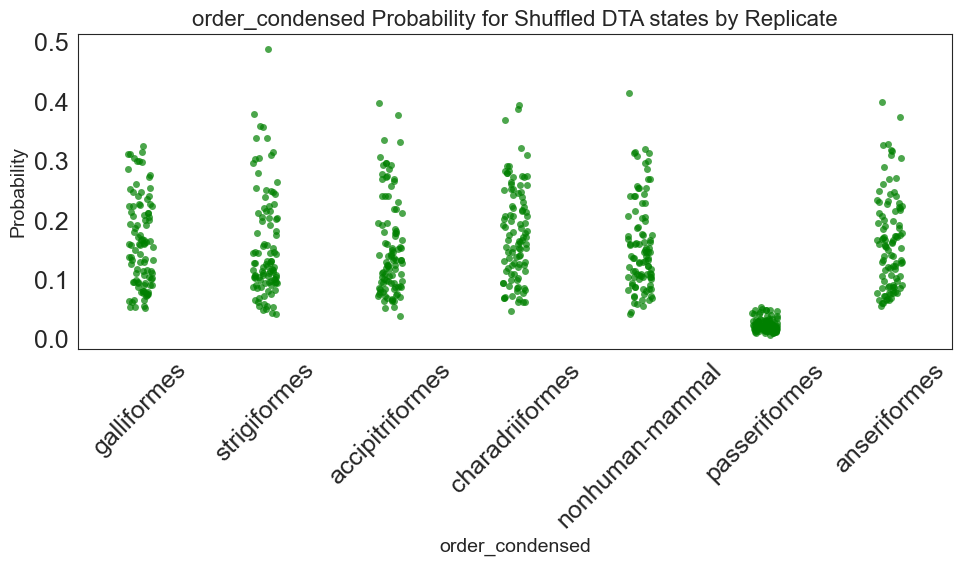

galliformes        0.162190
strigiformes       0.157921
accipitriformes    0.155225
charadriiformes    0.179128
nonhuman-mammal    0.156798
passeriformes      0.024577
anseriformes       0.164161
dtype: float64

In [70]:
# Set the root directory to start the search
root_dir = "~~2025-05-29/orders/eq3"  # <-- Replace this

# Open output file for writing
with open("order_condensed_output.txt", "w") as out_file:
    # Recursively walk through all subdirectories
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if "outfilemcc.tree" in filenames:
            filepath = os.path.join(dirpath, "outfilemcc.tree")
            out_file.write(f"\nProcessing file: {filepath}\n")

            # Load the tree
            tree = dendropy.Tree.get(
                path=filepath,
                schema="nexus",
                preserve_underscores=True
            )

            # Get root node
            root_node = tree.seed_node

            # Extract annotations of interest
            order_condensed_set = None
            order_condensed_prob = None
            for ann in root_node.annotations:
                if ann.name == "order_condensed.set":
                    order_condensed_set = ann.value
                elif ann.name == "order_condensed.set.prob":
                    order_condensed_prob = ann.value

            # Write results to file
            out_file.write(f"  order_condensed.set: {order_condensed_set}\n")
            out_file.write(f"  order_condensed.set.prob: {order_condensed_prob}\n")


with open("order_condensed_output.txt") as f:
    lines = f.readlines()

records = []
current_replicate = None
current_order_condensed_order = None

# Regex for floating numbers including scientific notation
float_re = re.compile(r"[-+]?\d*\.\d+(?:[Ee][-+]?\d+)?|[-+]?\d+(?:[Ee][-+]?\d+)?")

for line in lines:
    line = line.strip()

    if line.startswith("Processing file:"):
        match = re.search(r"replicate_(\d+)", line)
        if match:
            current_replicate = match.group(1)

    elif line.startswith("order_condensed.set:"):
        current_order_condensed_order = re.findall(r'"(.*?)"', line)

    elif line.startswith("order_condensed.set.prob:"):
        probs = float_re.findall(line)
        if current_order_condensed_order and probs:
            record = {"replicate": int(current_replicate)}
            for order_condensed, prob in zip(current_order_condensed_order, probs):
                record[order_condensed] = float(prob)
            records.append(record)

df = pd.DataFrame(records)
df = df.sort_values("replicate").reset_index(drop=True)
df.to_csv("order_condensed_probabilities.csv", index=False)

print(df.head())

# Melt to long format
df_long = df.melt(id_vars="replicate", var_name="order_condensed", value_name="probability")

# Set font globally to Arial and increase size
plt.rcParams.update({
    "font.size": 18,
    "font.family": "Arial"
})

plt.figure(figsize=(10, 6))

# Remove grid lines by setting style to 'white' or disable grid
sns.set_style("white")  # white background with no grid

# Create the stripplot with green dots and jitter
sns.stripplot(data=df_long, x="order_condensed", y="probability", jitter=True, alpha=0.7, color="green")

plt.title("order_condensed Probability for Shuffled DTA states by Replicate", fontsize=16)
plt.ylabel("Probability", fontsize=14)
plt.xlabel("order_condensed", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()

# Save plot to PDF
plt.savefig("order_condensed_probabilities_by_replicate.pdf", format='pdf')

plt.show()


(df.drop(columns="replicate")).sum() / len(df)

   replicate  galliformes  strigiformes  accipitriformes  charadriiformes  \
0          1     0.033296      0.027747         0.519423         0.023307   
1          2     0.022198      0.016648         0.341842         0.054384   
2          3     0.037736      0.022198         0.546060         0.028857   
3          4     0.106548      0.019978         0.324084         0.014428   
4          5     0.037736      0.024417         0.432852         0.019978   

   nonhuman-mammal  passeriformes  anseriformes  
0         0.045505       0.006659      0.344062  
1         0.005549       0.062153      0.497225  
2         0.007769       0.017758      0.339623  
3         0.005549       0.006659      0.522752  
4         0.004440       0.021088      0.459489  


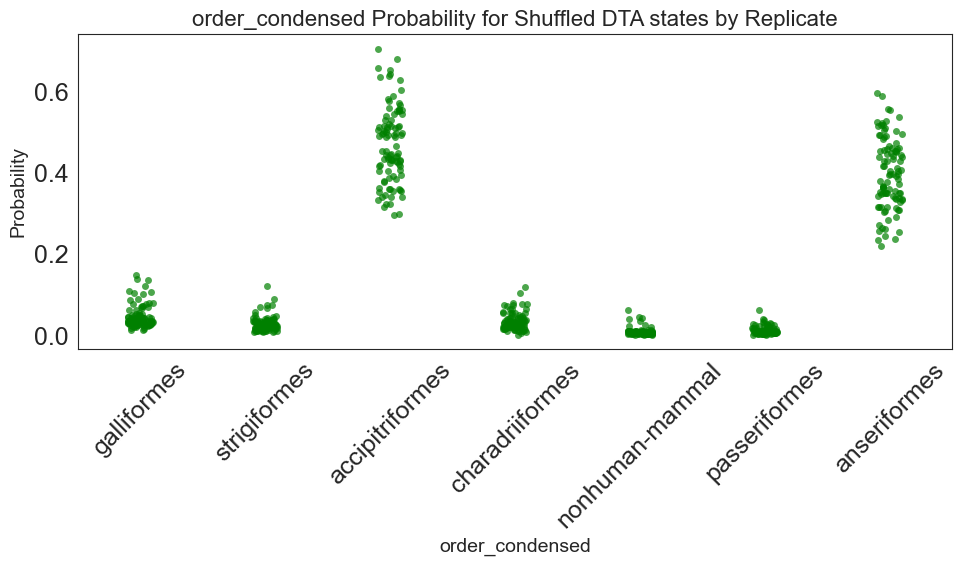

galliformes        0.046281
strigiformes       0.029104
accipitriformes    0.469292
charadriiformes    0.033867
nonhuman-mammal    0.009398
passeriformes      0.012571
anseriformes       0.399486
dtype: float64

In [16]:
# Set the root directory to start the search
root_dir = "~~2025-05-29/orders/prop1-x/"  # <-- Replace this

# Open output file for writing
with open("order_condensed_output.txt", "w") as out_file:
    # Recursively walk through all subdirectories
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if "outfilemcc.tree" in filenames:
            filepath = os.path.join(dirpath, "outfilemcc.tree")
            out_file.write(f"\nProcessing file: {filepath}\n")

            # Load the tree
            tree = dendropy.Tree.get(
                path=filepath,
                schema="nexus",
                preserve_underscores=True
            )

            # Get root node
            root_node = tree.seed_node

            # Extract annotations of interest
            order_condensed_set = None
            order_condensed_prob = None
            for ann in root_node.annotations:
                if ann.name == "order_condensed.set":
                    order_condensed_set = ann.value
                elif ann.name == "order_condensed.set.prob":
                    order_condensed_prob = ann.value

            # Write results to file
            out_file.write(f"  order_condensed.set: {order_condensed_set}\n")
            out_file.write(f"  order_condensed.set.prob: {order_condensed_prob}\n")


with open("order_condensed_output.txt") as f:
    lines = f.readlines()

records = []
current_replicate = None
current_order_condensed_order = None

# Regex for floating numbers including scientific notation
float_re = re.compile(r"[-+]?\d*\.\d+(?:[Ee][-+]?\d+)?|[-+]?\d+(?:[Ee][-+]?\d+)?")

for line in lines:
    line = line.strip()

    if line.startswith("Processing file:"):
        match = re.search(r"replicate_(\d+)", line)
        if match:
            current_replicate = match.group(1)

    elif line.startswith("order_condensed.set:"):
        current_order_condensed_order = re.findall(r'"(.*?)"', line)

    elif line.startswith("order_condensed.set.prob:"):
        probs = float_re.findall(line)
        if current_order_condensed_order and probs:
            record = {"replicate": int(current_replicate)}
            for order_condensed, prob in zip(current_order_condensed_order, probs):
                record[order_condensed] = float(prob)
            records.append(record)

df = pd.DataFrame(records)
df = df.sort_values("replicate").reset_index(drop=True)
df.to_csv("order_condensed_probabilities.csv", index=False)

print(df.head())

# Melt to long format
df_long = df.melt(id_vars="replicate", var_name="order_condensed", value_name="probability")

# Set font globally to Arial and increase size
plt.rcParams.update({
    "font.size": 18,
    "font.family": "Arial"
})

plt.figure(figsize=(10, 6))

# Remove grid lines by setting style to 'white' or disable grid
sns.set_style("white")  # white background with no grid

# Create the stripplot with green dots and jitter
sns.stripplot(data=df_long, x="order_condensed", y="probability", jitter=True, alpha=0.7, color="green")

plt.title("order_condensed Probability for Shuffled DTA states by Replicate", fontsize=16)
plt.ylabel("Probability", fontsize=14)
plt.xlabel("order_condensed", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()

# Save plot to PDF
plt.savefig("order_condensed_prop1_probabilities_by_replicate.pdf", format='pdf')

plt.show()


(df.drop(columns="replicate")).sum() / len(df)

   replicate  galliformes  strigiformes  accipitriformes  charadriiformes  \
0          1     0.055494      0.033296         0.350721         0.078801   
1          2     0.064516      0.014663         0.375367         0.082111   
2          3     0.084211      0.034586         0.395489         0.073684   
3          4     0.094340      0.046615         0.358491         0.062153   
4          5     0.214206      0.023307         0.340733         0.068812   

   nonhuman-mammal  passeriformes  anseriformes  
0         0.116537       0.028857      0.336293  
1         0.149560       0.008798      0.304985  
2         0.010526       0.055639      0.345865  
3         0.036626       0.026637      0.375139  
4         0.011099       0.015538      0.326304  


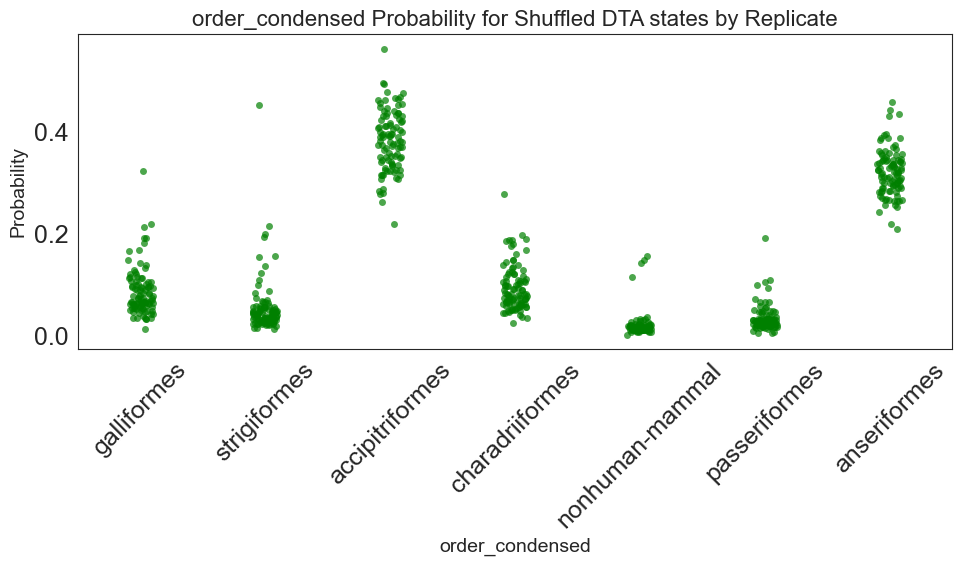

galliformes        0.087533
strigiformes       0.055892
accipitriformes    0.384153
charadriiformes    0.094376
nonhuman-mammal    0.021375
passeriformes      0.034686
anseriformes       0.321986
dtype: float64

In [76]:
# Set the root directory to start the search
root_dir = "~~2025-05-29/orders/prop2"  # <-- Replace this

# Open output file for writing
with open("order_condensed_output.txt", "w") as out_file:
    # Recursively walk through all subdirectories
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if "outfilemcc.tree" in filenames:
            filepath = os.path.join(dirpath, "outfilemcc.tree")
            out_file.write(f"\nProcessing file: {filepath}\n")

            # Load the tree
            tree = dendropy.Tree.get(
                path=filepath,
                schema="nexus",
                preserve_underscores=True
            )

            # Get root node
            root_node = tree.seed_node

            # Extract annotations of interest
            order_condensed_set = None
            order_condensed_prob = None
            for ann in root_node.annotations:
                if ann.name == "order_condensed.set":
                    order_condensed_set = ann.value
                elif ann.name == "order_condensed.set.prob":
                    order_condensed_prob = ann.value

            # Write results to file
            out_file.write(f"  order_condensed.set: {order_condensed_set}\n")
            out_file.write(f"  order_condensed.set.prob: {order_condensed_prob}\n")


with open("order_condensed_output.txt") as f:
    lines = f.readlines()

records = []
current_replicate = None
current_order_condensed_order = None

# Regex for floating numbers including scientific notation
float_re = re.compile(r"[-+]?\d*\.\d+(?:[Ee][-+]?\d+)?|[-+]?\d+(?:[Ee][-+]?\d+)?")

for line in lines:
    line = line.strip()

    if line.startswith("Processing file:"):
        match = re.search(r"replicate_(\d+)", line)
        if match:
            current_replicate = match.group(1)

    elif line.startswith("order_condensed.set:"):
        current_order_condensed_order = re.findall(r'"(.*?)"', line)

    elif line.startswith("order_condensed.set.prob:"):
        probs = float_re.findall(line)
        if current_order_condensed_order and probs:
            record = {"replicate": int(current_replicate)}
            for order_condensed, prob in zip(current_order_condensed_order, probs):
                record[order_condensed] = float(prob)
            records.append(record)

df = pd.DataFrame(records)
df = df.sort_values("replicate").reset_index(drop=True)
df.to_csv("order_condensed_probabilities.csv", index=False)

print(df.head())

# Melt to long format
df_long = df.melt(id_vars="replicate", var_name="order_condensed", value_name="probability")

# Set font globally to Arial and increase size
plt.rcParams.update({
    "font.size": 18,
    "font.family": "Arial"
})

plt.figure(figsize=(10, 6))

# Remove grid lines by setting style to 'white' or disable grid
sns.set_style("white")  # white background with no grid

# Create the stripplot with green dots and jitter
sns.stripplot(data=df_long, x="order_condensed", y="probability", jitter=True, alpha=0.7, color="green")

plt.title("order_condensed Probability for Shuffled DTA states by Replicate", fontsize=16)
plt.ylabel("Probability", fontsize=14)
plt.xlabel("order_condensed", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()

# Save plot to PDF
plt.savefig("order_condensed_e1probabilities_by_replicate.pdf", format='pdf')

plt.show()


(df.drop(columns="replicate")).sum() / len(df)

   replicate  galliformes  strigiformes  accipitriformes  charadriiformes  \
0          1     0.085461      0.029967         0.382908         0.113208   
1          2     0.072142      0.037736         0.366260         0.108768   
2          3     0.036626      0.023307         0.339623         0.280799   
3          4     0.051054      0.032186         0.319645         0.199778   
4          5     0.063263      0.028857         0.432852         0.138735   

   nonhuman-mammal  passeriformes  anseriformes  
0         0.031077       0.025527      0.331853  
1         0.034406       0.026637      0.354051  
2         0.028857       0.017758      0.273030  
3         0.032186       0.018868      0.346282  
4         0.032186       0.032186      0.271920  


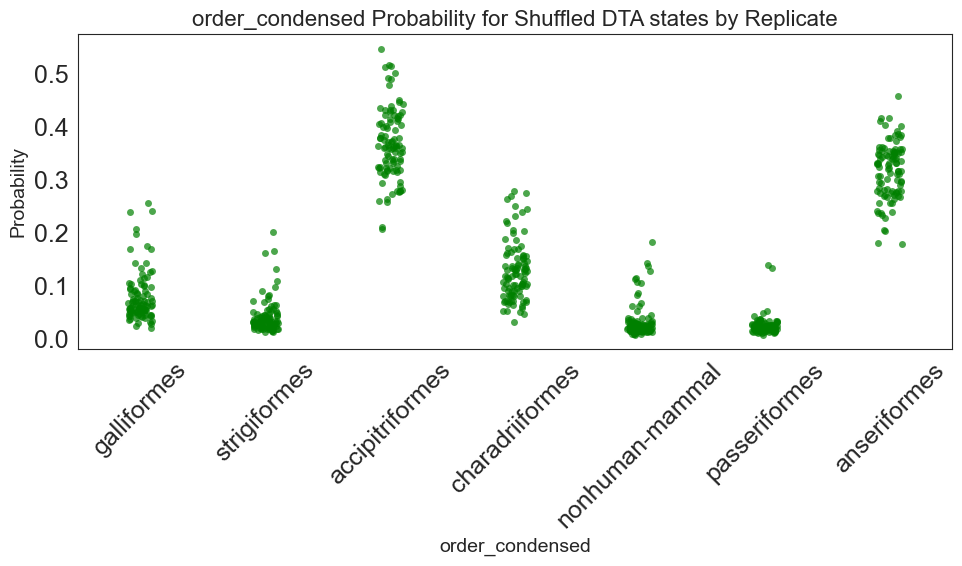

galliformes        0.080169
strigiformes       0.043095
accipitriformes    0.368917
charadriiformes    0.128802
nonhuman-mammal    0.034552
passeriformes      0.025729
anseriformes       0.318737
dtype: float64

In [11]:
# Set the root directory to start the search
root_dir = "~~2025-05-29/orders/prop3"  # <-- Replace this

# Open output file for writing
with open("order_condensed_output.txt", "w") as out_file:
    # Recursively walk through all subdirectories
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if "outfilemcc.tree" in filenames:
            filepath = os.path.join(dirpath, "outfilemcc.tree")
            out_file.write(f"\nProcessing file: {filepath}\n")

            # Load the tree
            tree = dendropy.Tree.get(
                path=filepath,
                schema="nexus",
                preserve_underscores=True
            )

            # Get root node
            root_node = tree.seed_node

            # Extract annotations of interest
            order_condensed_set = None
            order_condensed_prob = None
            for ann in root_node.annotations:
                if ann.name == "order_condensed.set":
                    order_condensed_set = ann.value
                elif ann.name == "order_condensed.set.prob":
                    order_condensed_prob = ann.value

            # Write results to file
            out_file.write(f"  order_condensed.set: {order_condensed_set}\n")
            out_file.write(f"  order_condensed.set.prob: {order_condensed_prob}\n")


with open("order_condensed_output.txt") as f:
    lines = f.readlines()

records = []
current_replicate = None
current_order_condensed_order = None

# Regex for floating numbers including scientific notation
float_re = re.compile(r"[-+]?\d*\.\d+(?:[Ee][-+]?\d+)?|[-+]?\d+(?:[Ee][-+]?\d+)?")

for line in lines:
    line = line.strip()

    if line.startswith("Processing file:"):
        match = re.search(r"replicate_(\d+)", line)
        if match:
            current_replicate = match.group(1)

    elif line.startswith("order_condensed.set:"):
        current_order_condensed_order = re.findall(r'"(.*?)"', line)

    elif line.startswith("order_condensed.set.prob:"):
        probs = float_re.findall(line)
        if current_order_condensed_order and probs:
            record = {"replicate": int(current_replicate)}
            for order_condensed, prob in zip(current_order_condensed_order, probs):
                record[order_condensed] = float(prob)
            records.append(record)

df = pd.DataFrame(records)
df = df.sort_values("replicate").reset_index(drop=True)
df.to_csv("order_condensed_probabilities.csv", index=False)

print(df.head())

# Melt to long format
df_long = df.melt(id_vars="replicate", var_name="order_condensed", value_name="probability")

# Set font globally to Arial and increase size
plt.rcParams.update({
    "font.size": 18,
    "font.family": "Arial"
})

plt.figure(figsize=(10, 6))

# Remove grid lines by setting style to 'white' or disable grid
sns.set_style("white")  # white background with no grid

# Create the stripplot with green dots and jitter
sns.stripplot(data=df_long, x="order_condensed", y="probability", jitter=True, alpha=0.7, color="green")

plt.title("order_condensed Probability for Shuffled DTA states by Replicate", fontsize=16)
plt.ylabel("Probability", fontsize=14)
plt.xlabel("order_condensed", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()

# Save plot to PDF
plt.savefig("order_condensedprop3_probabilities_by_replicate.pdf", format='pdf')

plt.show()


(df.drop(columns="replicate")).sum() / len(df)

   replicate  galliformes  strigiformes  accipitriformes  charadriiformes  \
0          1     0.055494      0.033296         0.350721         0.078801   
1          2     0.064516      0.014663         0.375367         0.082111   
2          3     0.084211      0.034586         0.395489         0.073684   
3          4     0.094340      0.046615         0.358491         0.062153   
4          5     0.214206      0.023307         0.340733         0.068812   

   nonhuman-mammal  passeriformes  anseriformes  
0         0.116537       0.028857      0.336293  
1         0.149560       0.008798      0.304985  
2         0.010526       0.055639      0.345865  
3         0.036626       0.026637      0.375139  
4         0.011099       0.015538      0.326304  


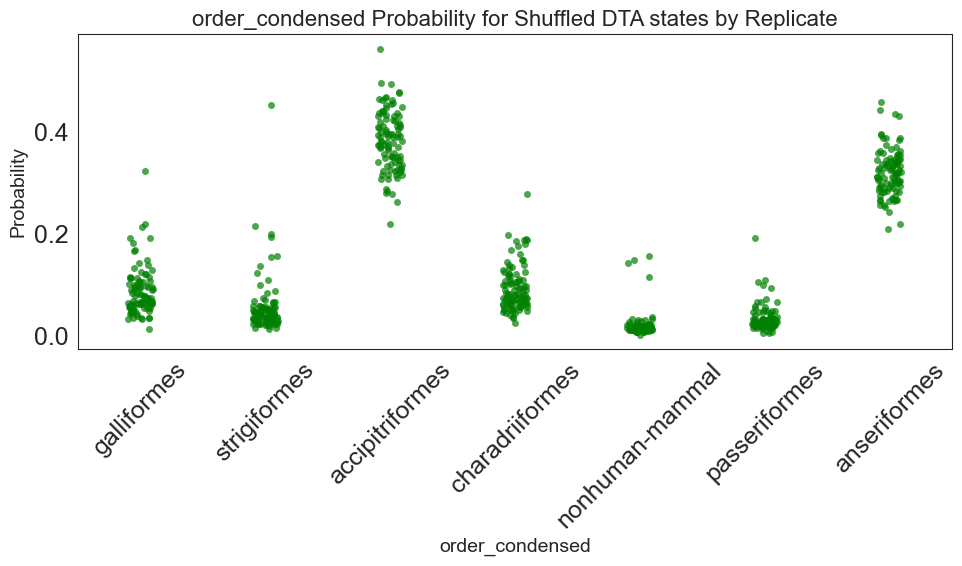

galliformes        0.087533
strigiformes       0.055892
accipitriformes    0.384153
charadriiformes    0.094376
nonhuman-mammal    0.021375
passeriformes      0.034686
anseriformes       0.321986
dtype: float64

In [12]:
# Set the root directory to start the search
root_dir = "~~2025-05-29/orders/prop2"  # <-- Replace this

# Open output file for writing
with open("order_condensed_output.txt", "w") as out_file:
    # Recursively walk through all subdirectories
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if "outfilemcc.tree" in filenames:
            filepath = os.path.join(dirpath, "outfilemcc.tree")
            out_file.write(f"\nProcessing file: {filepath}\n")

            # Load the tree
            tree = dendropy.Tree.get(
                path=filepath,
                schema="nexus",
                preserve_underscores=True
            )

            # Get root node
            root_node = tree.seed_node

            # Extract annotations of interest
            order_condensed_set = None
            order_condensed_prob = None
            for ann in root_node.annotations:
                if ann.name == "order_condensed.set":
                    order_condensed_set = ann.value
                elif ann.name == "order_condensed.set.prob":
                    order_condensed_prob = ann.value

            # Write results to file
            out_file.write(f"  order_condensed.set: {order_condensed_set}\n")
            out_file.write(f"  order_condensed.set.prob: {order_condensed_prob}\n")


with open("order_condensed_output.txt") as f:
    lines = f.readlines()

records = []
current_replicate = None
current_order_condensed_order = None

# Regex for floating numbers including scientific notation
float_re = re.compile(r"[-+]?\d*\.\d+(?:[Ee][-+]?\d+)?|[-+]?\d+(?:[Ee][-+]?\d+)?")

for line in lines:
    line = line.strip()

    if line.startswith("Processing file:"):
        match = re.search(r"replicate_(\d+)", line)
        if match:
            current_replicate = match.group(1)

    elif line.startswith("order_condensed.set:"):
        current_order_condensed_order = re.findall(r'"(.*?)"', line)

    elif line.startswith("order_condensed.set.prob:"):
        probs = float_re.findall(line)
        if current_order_condensed_order and probs:
            record = {"replicate": int(current_replicate)}
            for order_condensed, prob in zip(current_order_condensed_order, probs):
                record[order_condensed] = float(prob)
            records.append(record)

df = pd.DataFrame(records)
df = df.sort_values("replicate").reset_index(drop=True)
df.to_csv("order_condensed_prop2_probabilities.csv", index=False)

print(df.head())

# Melt to long format
df_long = df.melt(id_vars="replicate", var_name="order_condensed", value_name="probability")

# Set font globally to Arial and increase size
plt.rcParams.update({
    "font.size": 18,
    "font.family": "Arial"
})

plt.figure(figsize=(10, 6))

# Remove grid lines by setting style to 'white' or disable grid
sns.set_style("white")  # white background with no grid

# Create the stripplot with green dots and jitter
sns.stripplot(data=df_long, x="order_condensed", y="probability", jitter=True, alpha=0.7, color="green")

plt.title("order_condensed Probability for Shuffled DTA states by Replicate", fontsize=16)
plt.ylabel("Probability", fontsize=14)
plt.xlabel("order_condensed", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()

# Save plot to PDF
plt.savefig("order_condensed_probabilities_by_replicate.pdf", format='pdf')

plt.show()


(df.drop(columns="replicate")).sum() / len(df)

   replicate  nonhuman_mammal  domestic  PartMigratory  Migratory  Sedentary
0          1         0.457270  0.199778       0.135405   0.098779   0.108768
1          2         0.260821  0.586016       0.038846   0.041065   0.073252
2          3         0.087680  0.304107       0.168701   0.229745   0.209767
3          4         0.156493  0.097669       0.579356   0.122087   0.044395
4          5         0.218646  0.092120       0.097669   0.537181   0.054384


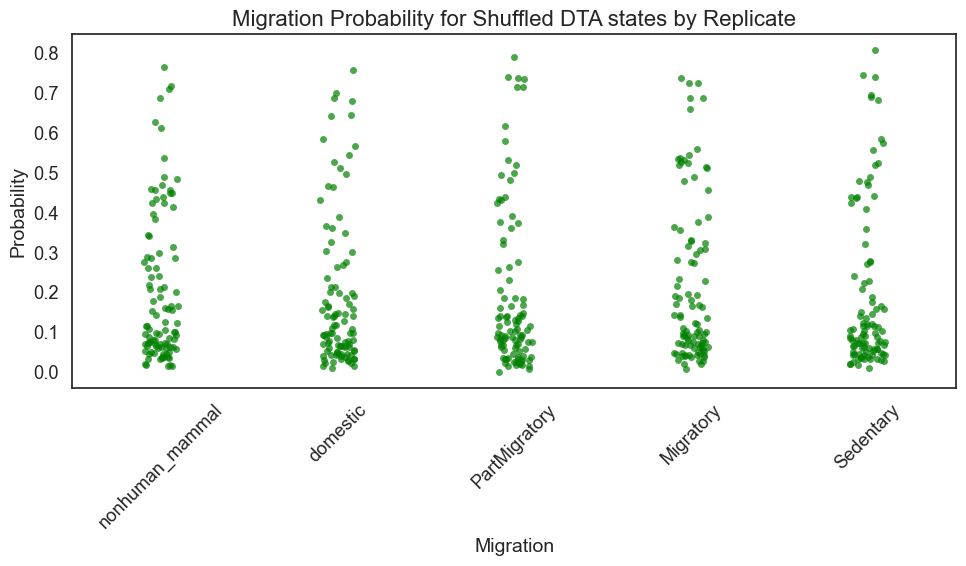

nonhuman_mammal    0.207092
domestic           0.189156
PartMigratory      0.191731
Migratory          0.217137
Sedentary          0.194883
dtype: float64

In [36]:
# Set the root directory to start the search
root_dir = "~~2025-06-06/migration"  # <-- Replace this

# Open output file for writing
with open("Migration_output.txt", "w") as out_file:
    # Recursively walk through all subdirectories
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if "outfilemcc.tree" in filenames:
            filepath = os.path.join(dirpath, "outfilemcc.tree")
            out_file.write(f"\nProcessing file: {filepath}\n")

            # Load the tree
            tree = dendropy.Tree.get(
                path=filepath,
                schema="nexus",
                preserve_underscores=True
            )

            # Get root node
            root_node = tree.seed_node

            # Extract annotations of interest
            Migration_set = None
            Migration_prob = None
            for ann in root_node.annotations:
                if ann.name == "Migration.set":
                    Migration_set = ann.value
                elif ann.name == "Migration.set.prob":
                    Migration_prob = ann.value

            # Write results to file
            out_file.write(f"  Migration.set: {Migration_set}\n")
            out_file.write(f"  Migration.set.prob: {Migration_prob}\n")


with open("Migration_output.txt") as f:
    lines = f.readlines()

records = []
current_replicate = None
current_Migration_order = None

# Regex for floating numbers including scientific notation
float_re = re.compile(r"[-+]?\d*\.\d+(?:[Ee][-+]?\d+)?|[-+]?\d+(?:[Ee][-+]?\d+)?")

for line in lines:
    line = line.strip()

    if line.startswith("Processing file:"):
        match = re.search(r"replicate_(\d+)", line)
        if match:
            current_replicate = match.group(1)

    elif line.startswith("Migration.set:"):
        current_Migration_order = re.findall(r'"(.*?)"', line)

    elif line.startswith("Migration.set.prob:"):
        probs = float_re.findall(line)
        if current_Migration_order and probs:
            record = {"replicate": int(current_replicate)}
            for Migration, prob in zip(current_Migration_order, probs):
                record[Migration] = float(prob)
            records.append(record)

df = pd.DataFrame(records)
df = df.sort_values("replicate").reset_index(drop=True)
df.to_csv("Migration_probabilities.csv", index=False)

print(df.head())

# Melt to long format
df_long = df.melt(id_vars="replicate", var_name="Migration", value_name="probability")

# Set font globally to Arial and increase size
plt.rcParams.update({
    "font.size": 18,
    "font.family": "Arial"
})

plt.figure(figsize=(10, 6))

# Remove grid lines by setting style to 'white' or disable grid
sns.set_style("white")  # white background with no grid

# Create the stripplot with green dots and jitter
sns.stripplot(data=df_long, x="Migration", y="probability", jitter=True, alpha=0.7, color="green")

plt.title("Migration Probability for Shuffled DTA states by Replicate", fontsize=16)
plt.ylabel("Probability", fontsize=14)
plt.xlabel("Migration", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()

# Save plot to PDF
plt.savefig("Migration_probabilities_by_replicate.pdf", format='pdf')

plt.show()


(df.drop(columns="replicate")).sum() / len(df)

   replicate      Wild  Domestic
0          1  0.009989  0.990011
1          2  0.995560  0.004440
2          3  0.009989  0.990011
3          4  0.394007  0.605993
4          5  0.953385  0.046615


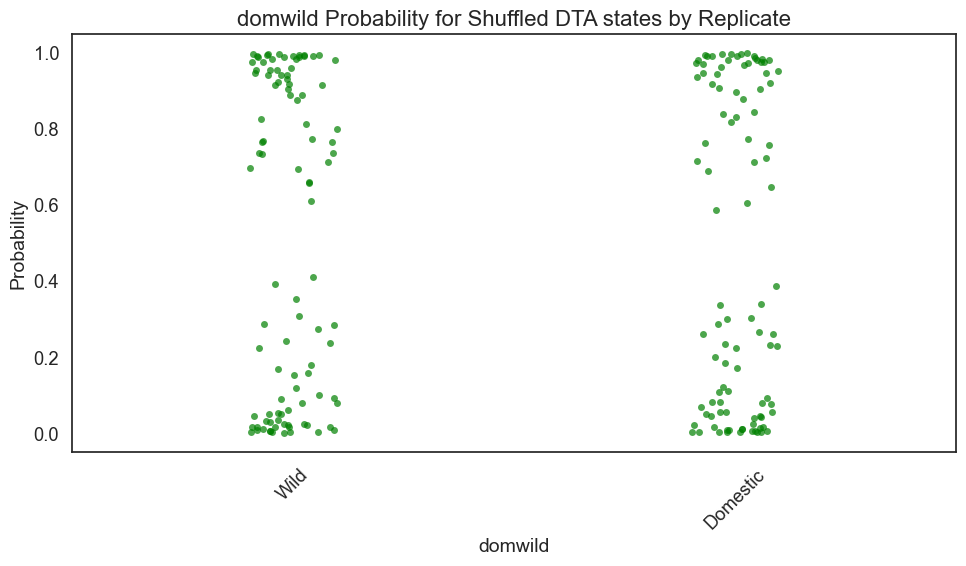

Wild        0.51727
Domestic    0.48273
dtype: float64

In [44]:
# Set the root directory to start the search
root_dir = "~~2025-06-06/domwild/domwild-equ"  # <-- Replace this

# Open output file for writing
with open("domwild2_output.txt", "w") as out_file:
    # Recursively walk through all subdirectories
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if "outfilemcc.tree" in filenames:
            filepath = os.path.join(dirpath, "outfilemcc.tree")
            out_file.write(f"\nProcessing file: {filepath}\n")

            # Load the tree
            tree = dendropy.Tree.get(
                path=filepath,
                schema="nexus",
                preserve_underscores=True
            )

            # Get root node
            root_node = tree.seed_node

            # Extract annotations of interest
            domwild_set = None
            domwild_prob = None
            for ann in root_node.annotations:
                if ann.name == "domwild.set":
                    domwild_set = ann.value
                elif ann.name == "domwild.set.prob":
                    domwild_prob = ann.value

            # Write results to file
            out_file.write(f"  domwild.set: {domwild_set}\n")
            out_file.write(f"  domwild.set.prob: {domwild_prob}\n")


with open("domwild2_output.txt") as f:
    lines = f.readlines()

records = []
current_replicate = None
current_domwild_order = None

# Regex for floating numbers including scientific notation
float_re = re.compile(r"[-+]?\d*\.\d+(?:[Ee][-+]?\d+)?|[-+]?\d+(?:[Ee][-+]?\d+)?")

for line in lines:
    line = line.strip()

    if line.startswith("Processing file:"):
        match = re.search(r"replicate_(\d+)", line)
        if match:
            current_replicate = match.group(1)

    elif line.startswith("domwild.set:"):
        current_domwild_order = re.findall(r'"(.*?)"', line)

    elif line.startswith("domwild.set.prob:"):
        probs = float_re.findall(line)
        if current_domwild_order and probs and current_replicate is not None:
            record = {"replicate": int(current_replicate)}
            for domwild, prob in zip(current_domwild_order, probs):
                record[domwild] = float(prob)
            records.append(record)

df = pd.DataFrame(records)
df = df.sort_values("replicate").reset_index(drop=True)
df.to_csv("domwild_probabilities.csv", index=False)

print(df.head())

# Melt to long format
df_long = df.melt(id_vars="replicate", var_name="domwild", value_name="probability")

# Set font globally to Arial and increase size
plt.rcParams.update({
    "font.size": 18,
    "font.family": "Arial"
})

plt.figure(figsize=(10, 6))

# Remove grid lines by setting style to 'white' or disable grid
sns.set_style("white")  # white background with no grid

# Create the stripplot with green dots and jitter
sns.stripplot(data=df_long, x="domwild", y="probability", jitter=True, alpha=0.7, color="green")

plt.title("domwild Probability for Shuffled DTA states by Replicate", fontsize=16)
plt.ylabel("Probability", fontsize=14)
plt.xlabel("domwild", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()

# Save plot to PDF
plt.savefig("domwild_probabilities_by_replicate.pdf", format='pdf')

plt.show()


(df.drop(columns="replicate")).sum() / len(df)


   replicate  domestic    turkey      wild
0          1  0.012209  0.082131  0.905660
1          2  0.059933  0.053274  0.886792
2          3  0.044395  0.091010  0.864595
3          4  0.007769  0.376249  0.615982
4          5  0.032186  0.014428  0.953385


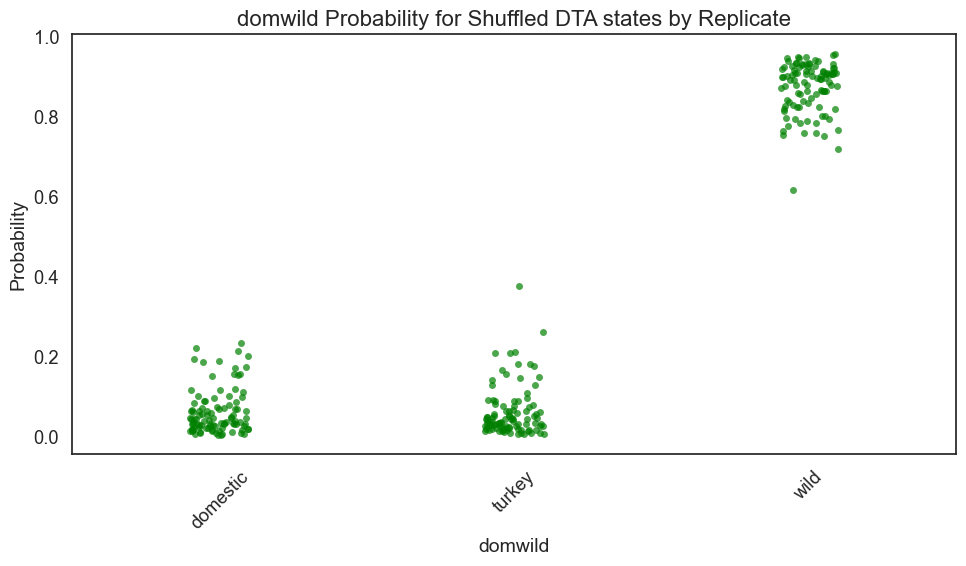

domestic    0.06394
turkey      0.06313
wild        0.87293
dtype: float64

In [46]:
# Set the root directory to start the search
root_dir = "~~2025-06-06/domwild/domwildturkey-equ"  # <-- Replace this

# Open output file for writing
with open("domwild2_output.txt", "w") as out_file:
    # Recursively walk through all subdirectories
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if "outfilemcc.tree" in filenames:
            filepath = os.path.join(dirpath, "outfilemcc.tree")
            out_file.write(f"\nProcessing file: {filepath}\n")

            # Load the tree
            tree = dendropy.Tree.get(
                path=filepath,
                schema="nexus",
                preserve_underscores=True
            )

            # Get root node
            root_node = tree.seed_node

            # Extract annotations of interest
            domwild_set = None
            domwild_prob = None
            for ann in root_node.annotations:
                if ann.name == "domwild.set":
                    domwild_set = ann.value
                elif ann.name == "domwild.set.prob":
                    domwild_prob = ann.value

            # Write results to file
            out_file.write(f"  domwild.set: {domwild_set}\n")
            out_file.write(f"  domwild.set.prob: {domwild_prob}\n")


with open("domwild2_output.txt") as f:
    lines = f.readlines()

records = []
current_replicate = None
current_domwild_order = None

# Regex for floating numbers including scientific notation
float_re = re.compile(r"[-+]?\d*\.\d+(?:[Ee][-+]?\d+)?|[-+]?\d+(?:[Ee][-+]?\d+)?")

for line in lines:
    line = line.strip()

    if line.startswith("Processing file:"):
        match = re.search(r"replicate_(\d+)", line)
        if match:
            current_replicate = match.group(1)

    elif line.startswith("domwild.set:"):
        current_domwild_order = re.findall(r'"(.*?)"', line)

    elif line.startswith("domwild.set.prob:"):
        probs = float_re.findall(line)
        if current_domwild_order and probs and current_replicate is not None:
            record = {"replicate": int(current_replicate)}
            for domwild, prob in zip(current_domwild_order, probs):
                record[domwild] = float(prob)
            records.append(record)

df = pd.DataFrame(records)
df = df.sort_values("replicate").reset_index(drop=True)
df.to_csv("domwild_probabilities.csv", index=False)

print(df.head())

# Melt to long format
df_long = df.melt(id_vars="replicate", var_name="domwild", value_name="probability")

# Set font globally to Arial and increase size
plt.rcParams.update({
    "font.size": 18,
    "font.family": "Arial"
})

plt.figure(figsize=(10, 6))

# Remove grid lines by setting style to 'white' or disable grid
sns.set_style("white")  # white background with no grid

# Create the stripplot with green dots and jitter
sns.stripplot(data=df_long, x="domwild", y="probability", jitter=True, alpha=0.7, color="green")

plt.title("domwild Probability for Shuffled DTA states by Replicate", fontsize=16)
plt.ylabel("Probability", fontsize=14)
plt.xlabel("domwild", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()

# Save plot to PDF
plt.savefig("domwildturk_probabilities_by_replicate.pdf", format='pdf')

plt.show()


(df.drop(columns="replicate")).sum() / len(df)